# IIR滤波器结构：并联型

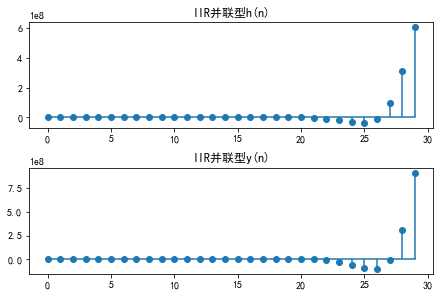

In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#parameters of defference equation
b = np.array([[-13.65,-14.81,0],[32.6,-16.37,0]]) #numerator
a = np.array([[1,-2.95,3.14],[1,-1,0.5]]) #denominator

#input signal
M = a.shape[0];N = 30
delta = signal.unit_impulse(N) #unit sample signal
y = np.ones(N) #unit step signal

#IIR parfilter
z1 = np.zeros((M,N));z2 = np.zeros((M,N));
for i in range(M): #分别通过M个滤波器，计算最终结果
    zi = signal.lfilter_zi(b[i,:],a[i,:])*0 #zero initial condition
    z1[i,:],_ = signal.lfilter(b[i,:],a[i,:],delta,zi=zi);
    z2[i,:],_ = signal.lfilter(b[i,:],a[i,:],y,zi=zi);

#plot
fig,axs = plt.subplots(2,1,constrained_layout=True)
axs[0].stem(np.sum(z1,axis=0),basefmt="")
axs[1].stem(np.sum(z2,axis=0),basefmt="")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
axs[0].set_title('IIR并联型h(n)');axs[1].set_title('IIR并联型y(n)')
plt.show();fig.savefig('./iir_par_sequence.png',dpi=500)
